**Task**:
    
    Testing the Cognite Data Platform API using «Open Industrial Data»

**References**:

1. [Cognite Python SDK](https://github.com/cognitedata/cognite-sdk-python) Github repository
1. [Open Industrial Data Project](https://openindustrialdata.com/) 
1. [Operational Intelligence](https://publicdata.opint.cogniteapp.com) Cognite open webapp 
1. [Documentation](https://doc.cognitedata.com/) for Cognite Data Platform
1. [Learn to use CDP](https://github.com/cognitedata/cognite-sdk-python/blob/master/examples/basics/Learn%20to%20use%20CDP.ipynb) Jupyter notebook
1. PH-ME-P-0152-001 Rev.Z5 Valhall P&ID 1st Stage Suction Scrubber

In [15]:
from datetime import datetime
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import seaborn as sns
#pd.set_option('display.max_rows', 30) 

from cognite.config import configure_session
from cognite.v05.assets import get_asset, get_assets, get_asset_subtree
from cognite.v05.files import list_files, get_file_info, download_file
from cognite.v05.timeseries import get_datapoints_frame, get_timeseries
from cognite.v05.tagmatching import tag_matching

In [16]:
configure_session(os.environ['COGNITE_API_KEY'], 'publicdata')

In [17]:
assets = get_assets()
assets_df = assets.to_pandas()
assets_df

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,2,GAS COMPRESSION AND RE-INJECTION (PH),3111454725058294,0,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",23,4.650652e+15,"[6687602007296940, 4650652196144007, 311145472..."
1,0,7,1ST STAGE COMP DRY GAS SEAL SYS ON PH,3904753668320840,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP DRY GAS SEAL SYS-PH,4.856008e+15,"[6687602007296940, 4650652196144007, 311145472..."
2,0,7,1ST STAGE COMP ENCLOSURE ON PH,2499711953216311,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP ENCLOSURE-PH,4.856008e+15,"[6687602007296940, 4650652196144007, 311145472..."
3,0,7,1ST STAGE COMP LUBE OIL SYS ON PH,2137557577165478,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMP LUBE OIL SYS-PH,4.856008e+15,"[6687602007296940, 4650652196144007, 311145472..."
4,0,4,1ST STAGE COMPRESSION ON PH,4518112062673878,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
5,0,5,1ST STAGE COMPRESSOR ON PH,7372310232665628,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSOR-PH,4.518112e+15,"[6687602007296940, 4650652196144007, 311145472..."
6,0,7,2ND STAGE COMP DRY GAS SEAL SYS ON PH,6658342189327214,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMP DRY GAS SEAL SYS-PH,4.222791e+15,"[6687602007296940, 4650652196144007, 311145472..."
7,0,4,2ND STAGE COMPRESSION ON PH,5786472304680477,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
8,0,5,2ND STAGE COMPRESSOR ON PH,4074033093163622,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSOR-PH,5.786472e+15,"[6687602007296940, 4650652196144007, 311145472..."
9,0,6,VRD - PH 1STSTGSUCT SCRUB INLET,1145062594143414,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531669', ...",23-AE-92527-S1,5.323189e+13,"[6687602007296940, 4650652196144007, 311145472..."


In [18]:
idx = 0
ast = assets_df.iloc[idx]
print(f'Asset index {idx}:\nname={ast["name"]}\ndescription={ast["description"]}\npath={ast["path"]}')

Asset index 0:
name=23
description=GAS COMPRESSION AND RE-INJECTION (PH)
path=[6687602007296940, 4650652196144007, 3111454725058294]


In [19]:
ast["metadata"]

{'SOURCE_DB': 'workmate',
 'SOURCE_TABLE': 'wmate_dba.wmt_system',
 'WMT_LOCATION_ID': '1004',
 'WMT_SYSTEM_ACTIVE': 'Y',
 'WMT_SYSTEM_CODE': '23',
 'WMT_SYSTEM_DESC': 'GAS COMPRESSION AND RE-INJECTION (PH)',
 'WMT_SYSTEM_ID': '4440',
 'WMT_SYSTEM_NAME': 'GAS COMPRESSION AND RE-INJECTION (PH)'}

In [20]:
scrubber_file_name = 'PH-ME-P-0152-001'
list_files(name=scrubber_file_name).to_pandas()

,createdTime,directory,fileName,fileType,id,lastUpdatedTime,metadata,source,uploaded,uploadedAt
0,1533213439872,/BP Operated Licenses/PL006B Valhall/99 Docume...,PH-ME-P-0152-001,tiff,6292237976899896,1533213483919,"{'area_name': 'PH,INTERMEDIATE DECK COOLER & S...",Documentum,True,1533213483919


In [21]:
idx = 0
download_file(list_files(name=scrubber_file_name).to_pandas().id[idx])

'https://storage.googleapis.com/cognite-storage/5977964818434649/6292237976899896/PH-ME-P-0152-001?GoogleAccessId=cloud-storage@cognitedata.iam.gserviceaccount.com&Expires=1543569231&Signature=m8pXMBFzkQXc9gvmZwys8pswv19zrUg33iNAeBTcrVCJhYHbVpAkSg12BJUX%2BiUZxJeroybwWHaziZyaY7drOUxv3Xtb%2F9RbRCLf2Ip6xfb73IneZhrdKdoBekcBELdNxXyk1KeT8%2BLhPVyw1D00tWpJGrGSr%2BM2qhtEpeMRKXvn%2Bpk98J6Ol9C1QBgRfjSW%2FuaA0ZYvDmmJzKinnjZEFfPBVkQeEOn%2BqcV3yA%2BPYlTCCz%2FvEujmeqKQZPXQ8nYDmfIY5SWITXH7gK87%2BfcAIF5su7XxZ%2BHXq1wvfWSR%2Fea0k5tobGDRWQyQFQVsT8Qoq7%2BjbLqziHwqm%2FdnZ1hPgw%3D%3D'

In [22]:
scrubber_level_working_setpoint = 'VAL_23-LIC-92521:Control Module:YR'
scrubber_level_measured_value  = 'VAL_23-LIC-92521:Z.X.Value'
scrubber_level_output  = 'VAL_23-LIC-92521:Z.Y.Value'
all_ts_names = [scrubber_level_working_setpoint, scrubber_level_measured_value, scrubber_level_output]
print(all_ts_names)

['VAL_23-LIC-92521:Control Module:YR', 'VAL_23-LIC-92521:Z.X.Value', 'VAL_23-LIC-92521:Z.Y.Value']


In [24]:
start = datetime(2018, 7, 1)
end = '1d-ago'
data = get_datapoints_frame(all_ts_names, start=start, end=end, granularity='1h', aggregates=['average', 'min', 'max'])
data = data.fillna(method='ffill')
data.head()

,timestamp,VAL_23-LIC-92521:Control Module:YR|average,VAL_23-LIC-92521:Control Module:YR|min,VAL_23-LIC-92521:Control Module:YR|max,VAL_23-LIC-92521:Z.X.Value|average,VAL_23-LIC-92521:Z.X.Value|min,VAL_23-LIC-92521:Z.X.Value|max,VAL_23-LIC-92521:Z.Y.Value|average,VAL_23-LIC-92521:Z.Y.Value|min,VAL_23-LIC-92521:Z.Y.Value|max
0,1530403200000,35.0,35.0,35.0,35.127482,34.287022,36.580452,36.225898,32.852486,41.348152
1,1530406800000,35.0,35.0,35.0,34.926104,33.992523,36.231022,35.466413,31.533926,39.901684
2,1530410400000,35.0,35.0,35.0,34.663202,33.580528,36.017395,31.829551,26.072357,38.202591
3,1530414000000,35.0,35.0,35.0,35.144910,34.268711,36.311893,33.104658,29.197401,37.303951
4,1530417600000,35.0,35.0,35.0,35.099385,34.280918,36.099792,33.911751,30.431208,38.298256


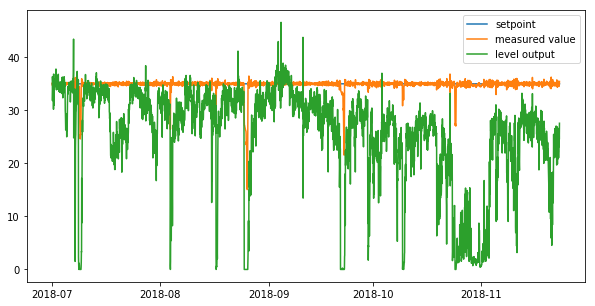

In [25]:
T = pd.to_datetime(data.timestamp, unit='ms')
plt.figure(figsize=(10, 5))
plt.plot(T, data[scrubber_level_working_setpoint+'|average'].values, label='setpoint')
plt.plot(T, data[scrubber_level_measured_value+'|average'].values, label='measured value')
plt.plot(T, data[scrubber_level_output+'|average'].values, label='level output')
plt.legend()
plt.show()

In [26]:
first_row_asset_id = 3111454725058294
get_asset(first_row_asset_id).to_pandas()

,0
id,3111454725058294
path,"[6687602007296940, 4650652196144007, 311145472..."
depth,2
name,23
parentId,4650652196144007
description,GAS COMPRESSION AND RE-INJECTION (PH)
metadata,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma..."
createdTime,0
lastUpdatedTime,0


In [27]:
parent_id = 4650652196144007
get_asset(parent_id).to_pandas()

,0
id,4650652196144007
path,"[6687602007296940, 4650652196144007]"
depth,1
name,VAL
parentId,6687602007296940
description,Valhall plattform
metadata,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma..."
createdTime,0
lastUpdatedTime,1543568437052


In [28]:
get_assets(description="Aker BP").to_pandas()

,createdTime,depth,description,id,lastUpdatedTime,name,path
0,0,0,Aker BP,6687602007296940,0,Aker BP,[6687602007296940]


In [29]:
akerbp_asset_id = 6687602007296940
akerbp_subtree = get_asset_subtree(akerbp_asset_id, depth=4)
akerbp_subtree.to_pandas()

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,0,Aker BP,6687602007296940,0,NaN,Aker BP,NaN,[6687602007296940]
1,0,1,Valhall plattform,4650652196144007,1543568437052,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",VAL,6.687602e+15,"[6687602007296940, 4650652196144007]"
2,0,2,GAS COMPRESSION AND RE-INJECTION (PH),3111454725058294,0,"{'SOURCE_DB': 'workmate', 'SOURCE_TABLE': 'wma...",23,4.650652e+15,"[6687602007296940, 4650652196144007, 311145472..."
3,0,3,GAS COMPRESSION AND RE-INJECTION ON PH,6895991969886325,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",230900,3.111455e+15,"[6687602007296940, 4650652196144007, 311145472..."
4,0,4,VRD - PH 1STSTGDISCCOOL COOLMED IN,1150715783816357,0,"{'ELC_STATUS_ID': '1212', 'SOURCE_DB': 'workma...",23-TT-92604B,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
5,0,4,1ST STAGE COMPRESSION ON PH,4518112062673878,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-1ST STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
6,0,4,2ND STAGE COMPRESSION ON PH,5786472304680477,0,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",23-2ND STAGE COMPRESSION-PH,6.895992e+15,"[6687602007296940, 4650652196144007, 311145472..."
